<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Deep_Learning_Keras_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


imports do dataset (carregamento e visualização)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Carregar Dataset

In [5]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
bike['datas'] = pd.to_datetime(bike['datas'])

Visualizando dados

In [7]:
#alterando parametros para todas as figuras 
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

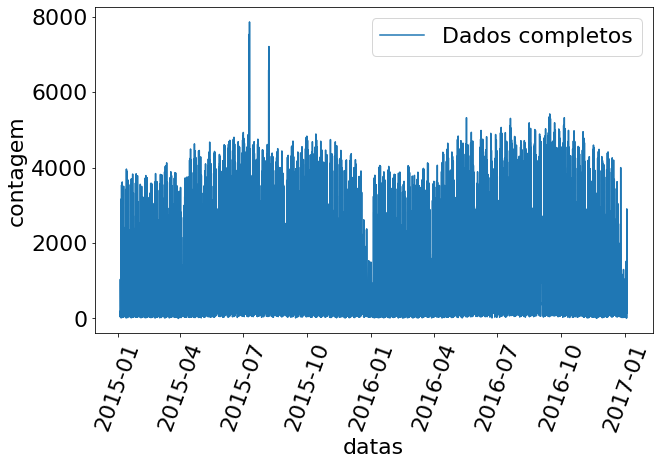

In [12]:
sns.lineplot(x='datas', y='contagem', data=bike, label='Dados completos')
plt.xticks(rotation=70)

Imports de préprocessamento dos dados

In [13]:
from sklearn.preprocessing import StandardScaler

Pré-processamento

In [14]:
sc = StandardScaler()
sc.fit(bike['contagem'].values.reshape(-1,1))
y = sc.transform(bike['contagem'].values.reshape(-1,1))

In [15]:
tamanho_treino = int(len(bike) * 0.9)
tamanho_teste = len(bike) - tamanho_treino

In [16]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

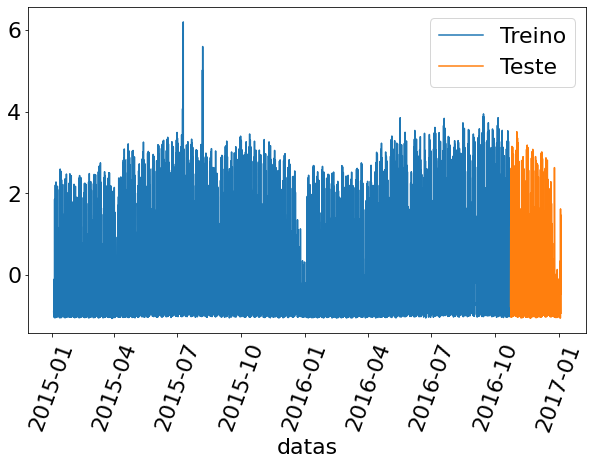

In [21]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='Treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='Teste')
plt.xticks(rotation=70)

In [22]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i  in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo


In [24]:
vetor = pd.DataFrame(ytreino)[0]
xtreino1, ytreino1 = separa_dados(vetor,10)

In [25]:
xtreino1

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [26]:
ytreino1

array([-0.56687377, -0.38347663, -0.25906149, ..., -0.9548647 ,
       -0.9548647 , -0.89403952])

In [28]:
vetor2 = pd.DataFrame(yteste)[0]
xteste1, yteste1 = separa_dados(vetor2, 10)

mudando a dimensão para a rede recorrente

In [31]:
xtreino1 = xtreino1.reshape((xtreino1.shape[0],xtreino1.shape[1],1))

In [32]:
xteste1 = xteste1.reshape((xteste1.shape[0],xteste1.shape[1],1))

Imports da rede neural

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU


In [38]:
recorrente1 = Sequential()

recorrente1.add(LSTM(128, input_shape=(xtreino1.shape[1], xtreino1.shape[2])))
recorrente1.add(Dense(units=1))

recorrente1.compile(loss='mean_squared_error', optimizer='RMSProp')


recorrente1.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [39]:
resultado1 = recorrente1.fit(xtreino1, ytreino1, validation_data=(xteste1, yteste1), epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 12ms/step - loss: 0.4488 - val_loss: 0.0665
Epoch 2/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0878 - val_loss: 0.0526
Epoch 3/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0552 - val_loss: 0.0491
Epoch 4/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0468 - val_loss: 0.0345
Epoch 5/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0439 - val_loss: 0.0245
Epoch 6/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0368 - val_loss: 0.0466
Epoch 7/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0354 - val_loss: 0.0292
Epoch 8/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0347 - val_loss: 0.0196
Epoch 9/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0384 - val_loss: 0.0247
Epoch 10/100
490/490 [==============================] - 5s 11ms/step - loss: 0.034

In [40]:
yajustado = recorrente1.predict(xtreino1)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

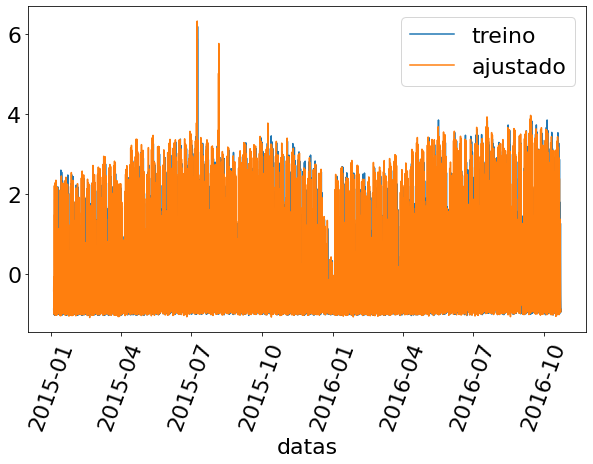

In [43]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yajustado[:,0], data=bike[0:15662], label='ajustado')
plt.xticks(rotation=70)

In [45]:
ypredito = recorrente1.predict(xteste1)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

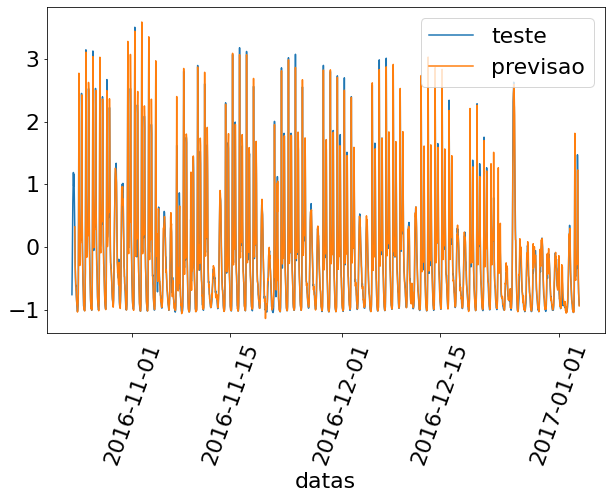

In [46]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=ypredito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsao')
plt.xticks(rotation=70)

In [50]:
recorrente2 = Sequential()

recorrente2.add(GRU(128, input_shape=(xtreino1.shape[1], xtreino1.shape[2])))
recorrente2.add(Dense(units=1))

recorrente2.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               50304     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [51]:
resultado2 = recorrente2.fit(xtreino1,ytreino1,validation_data=(xteste1, yteste1), epochs=100)

Epoch 1/100
490/490 [==============================] - 7s 10ms/step - loss: 0.4162 - val_loss: 0.0577
Epoch 2/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0734 - val_loss: 0.0412
Epoch 3/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0493 - val_loss: 0.0245
Epoch 4/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0422 - val_loss: 0.0258
Epoch 5/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0498 - val_loss: 0.0265
Epoch 6/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0343 - val_loss: 0.0203
Epoch 7/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0325 - val_loss: 0.0231
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0320 - val_loss: 0.0190
Epoch 9/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0382 - val_loss: 0.0271
Epoch 10/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0283 - val_l

In [58]:
yajustado2 = recorrente2.predict(xtreino1)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

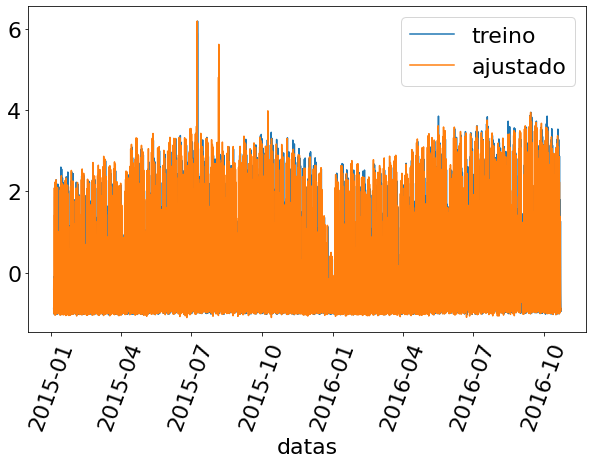

In [59]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yajustado2[:,0], data=bike[0:15662], label='ajustado')
plt.xticks(rotation=70)

In [60]:
ypredito2 = recorrente2.predict(xteste1)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

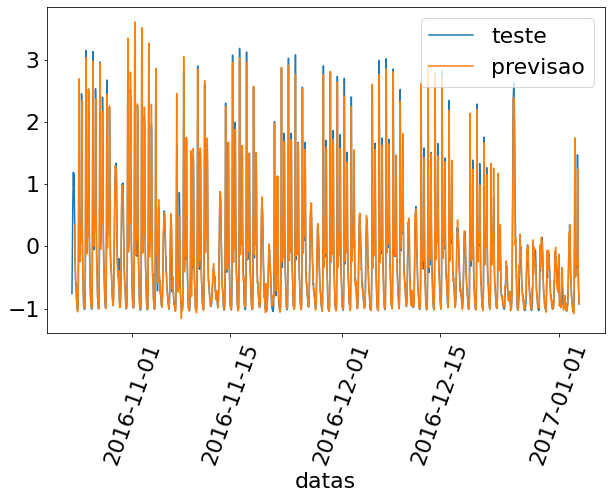

In [61]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=ypredito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsao')
plt.xticks(rotation=70)

In [62]:
print(resultado1.history.keys())

dict_keys(['loss', 'val_loss'])


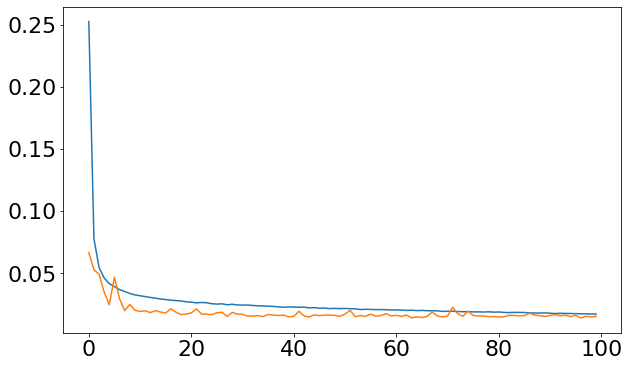

In [68]:
plt.plot(resultado1.history['loss'])
plt.plot(resultado1.history['val_loss'])

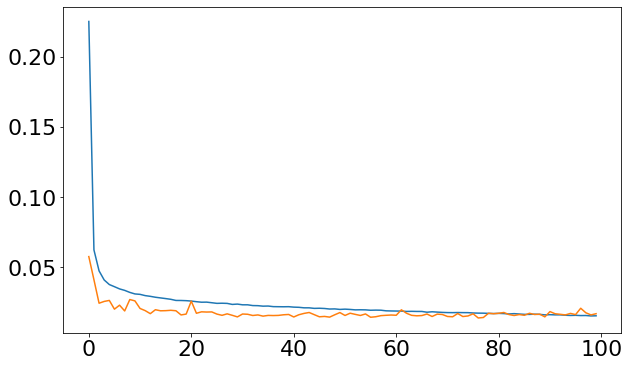

In [69]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])